# First steps with Scikit Learn library

### A simple example

In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import numpy as np

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In this problem, we have a bidimensional dataset which represents two categories: `r` and `g`, and other dataset which has not category.

In [2]:
data = np.array([[1,1], [1.5, 0.95], [1.5, 1.75], [1.9, 2], [2.2, 1.8], [2.5, 2.2]])
target = np.array(['r', 'r', 'r', 'g', 'g', 'g'])
newdata = np.array([[0.8, 1.5], [2.3, 2.8], [2, 2]])

The problem is find the categories of the new data, in the graphic are the black colour.

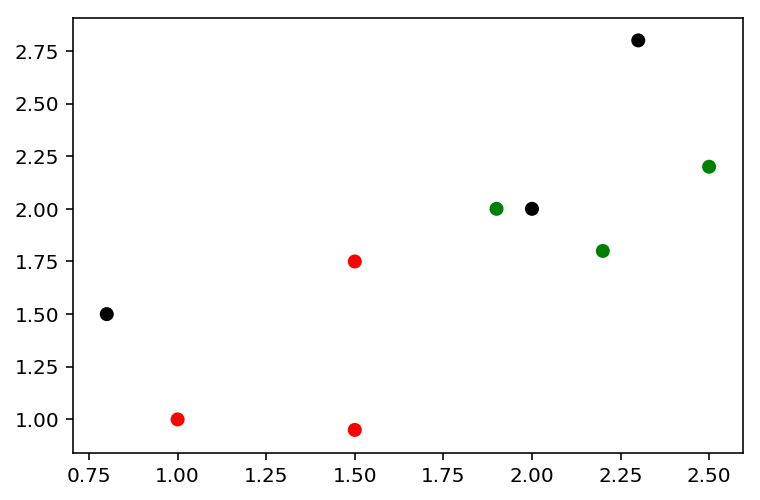

In [3]:
x = np.vstack([data, newdata])
col = np.concatenate([target, np.array(['k', 'k', 'k'])])

scatter(x = x[:, 0], y = x[:, 1], color = col)

For that, we are going to use the classifier `RadiusNeighborsClassifier` from `sklearn` library:

In [4]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Create the model without train and radius = 1
model = RadiusNeighborsClassifier(radius = 1)

# Train the model
model.fit(data, target)

# Predict the class of the new data
prediction = model.predict(newdata)
print(prediction)

['r' 'g' 'g']


Now, we are going to representate the predicted values and check if the categories have been assigned correctly:

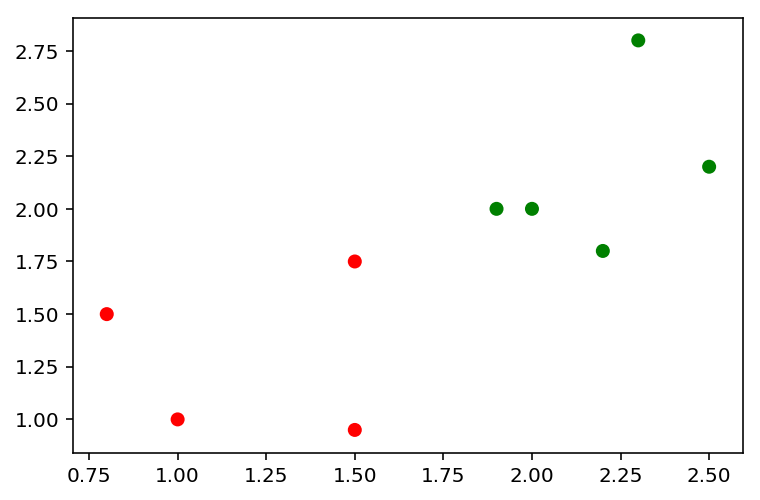

In [5]:
col = np.concatenate([target, prediction])

scatter(x = x[:, 0], y = x[:, 1], color = col)

We are going to use the classifier `KNeighborsClassifier` too. This classifier will give the same result that the last.

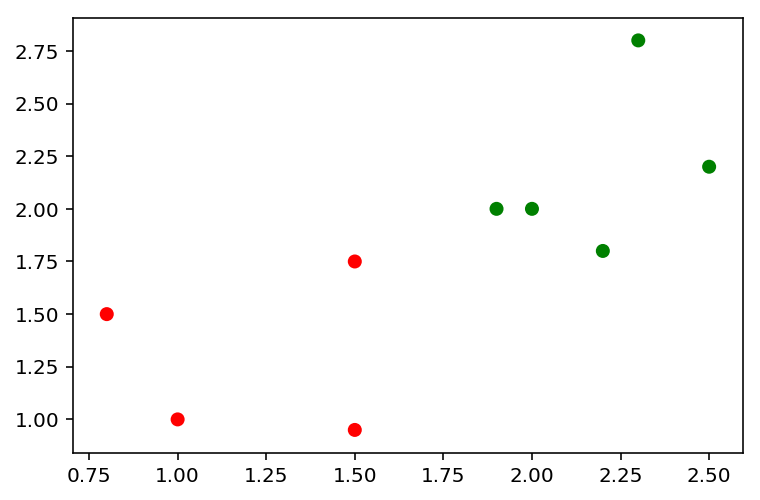

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model without train and n_neighbors = 3
model = KNeighborsClassifier(n_neighbors = 3)

# Train the model
model.fit(data, target)

# Predict the class of the new data
prediction = model.predict(newdata)

# Concatenate the prediction
col = np.concatenate([target, prediction])

# Plot the results
scatter(x = x[:, 0], y = x[:, 1], color = col)

### Using `iris` dataset

The last example was so easy. Now, we are going to use the `iris` dataset:

In [7]:
from sklearn.datasets import load_iris

# Load iris dataset
iris = load_iris()

# We are going to use the two first columns.
x = iris.data[:, 0:2]
target = iris.target

In [8]:
# Create the model without train and n_neighbors = 5
model = KNeighborsClassifier(n_neighbors = 5)

# Train the model
model.fit(x, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

(1.0, 5.3500000000000041)

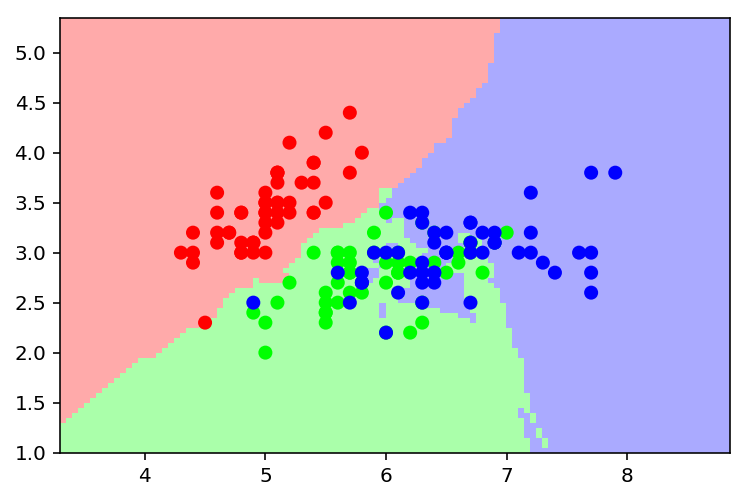

In [9]:
# Import ListedColormap to represent the prediction of the model
from matplotlib.colors import ListedColormap

# Create a light and bold version of the colours
cmap_light  = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold   = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Take the maximum and minimum of the axes for make a margin in the graphic
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

# Create the grid above we will give the light colour
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict the class
pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the result with the xx's shape
pred = pred.reshape(xx.shape)

# Put the ligth color with the predicted results
pcolormesh(xx, yy, pred, cmap = cmap_light)
# Put the real values of the class with the bold colour
scatter(x[:,0], x[:,1], c=target, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())

We can observe that in the bottom, the green points are overlapping with the blue points, it is because the number of neighbors is 5. We are going to use a higher number of neighbors for seeing what happens:

(1.0, 5.3500000000000041)

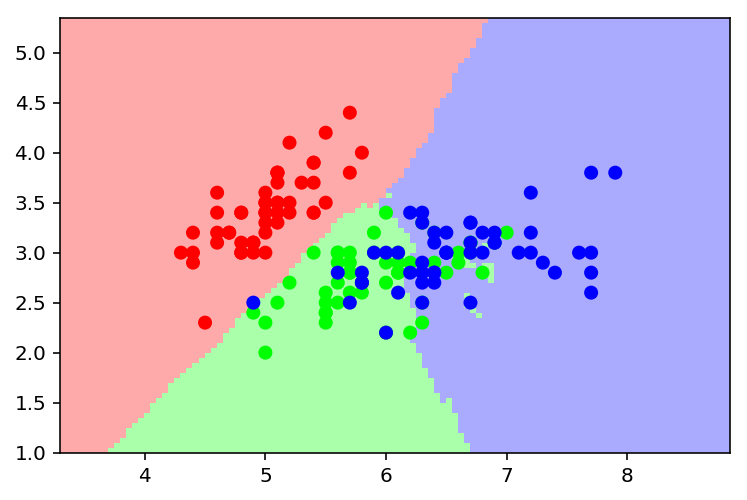

In [10]:
# Create the model without train and n_neighbors = 15
model_new = KNeighborsClassifier(n_neighbors = 15)

# Train the model
model_new.fit(x, target)

# Predict the class
pred = model_new.predict(np.c_[xx.ravel(), yy.ravel()])
# Reshape the result with the xx's shape
pred = pred.reshape(xx.shape)

# Put the ligth color with the predicted results
pcolormesh(xx, yy, pred, cmap = cmap_light)
# Put the real values of the class with the bold colour
scatter(x[:,0], x[:,1], c=target, cmap = cmap_bold)
xlim(xx.min(), xx.max())
ylim(yy.min(), yy.max())

Now, we are going to use the `RadiusNeighBorsClassifier` with the following radius: 0.3, 0.5, 0.7, 0.9 and 1.1:

In [15]:
# Create a light and bold version of the colours
cmap_light  = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAAAA']) # The last colour is for outliers
cmap_bold   = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


# Function which make the train and prediction of the model
# - x: data
# - target: data with the class
# - cmap_light: colour map for the predictions
# - cmap_bold: colour map for the class
# - radius: model's radius
def radiusModel(x, target, cmap_light, cmap_bold, radius) :
    from sklearn.neighbors import RadiusNeighborsClassifier
    
    # Create the model
    model = RadiusNeighborsClassifier(radius = radius, outlier_label = 3) # label of outliers = 3
    # Fit the model
    model.fit(x, target)


    # Take the maximum and minimum of the axes for make a margin in the graphic
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1

    # Create the grid above we will give the light colour
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    # Predict the class
    pred = model.predict(np.c_[xx.ravel(), yy.ravel()])
    # Reshape the result with the xx's shape
    pred = pred.reshape(xx.shape)

    # Put the ligth color with the predicted results
    pcolormesh(xx, yy, pred, cmap = cmap_light)
    # Put the real values of the class with the bold colour
    scatter(x[:,0], x[:,1], c=target, cmap = cmap_bold)
    xlim(xx.min(), xx.max())
    ylim(yy.min(), yy.max())

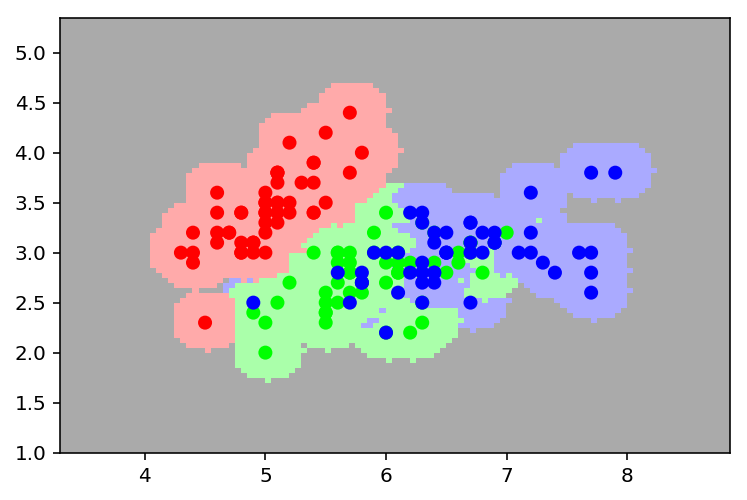

In [17]:
# radius = 0.3
radiusModel(x, target, cmap_light, cmap_bold, 0.3)

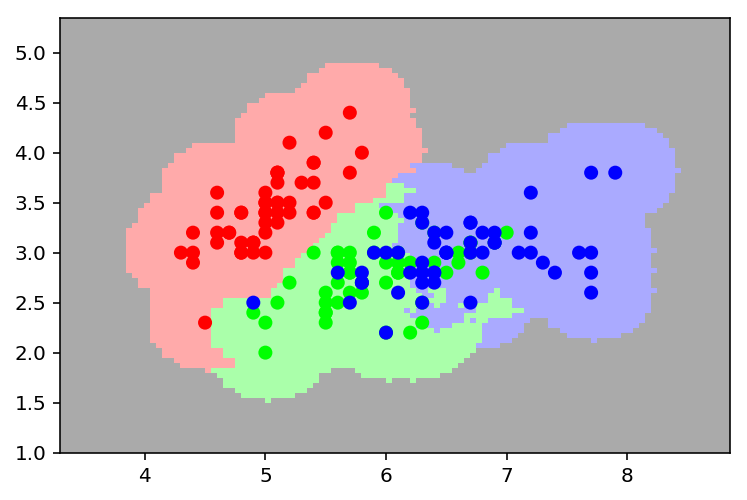

In [18]:
# radius = 0.5
radiusModel(x, target, cmap_light, cmap_bold, 0.5)

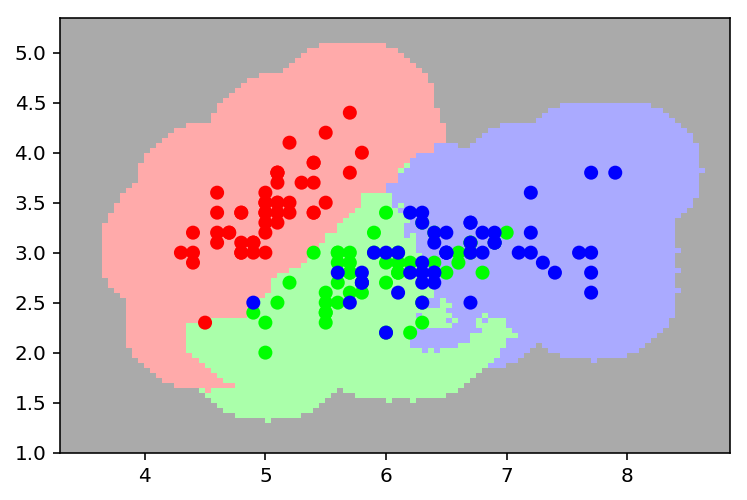

In [19]:
# radius = 0.7
radiusModel(x, target, cmap_light, cmap_bold, 0.7)

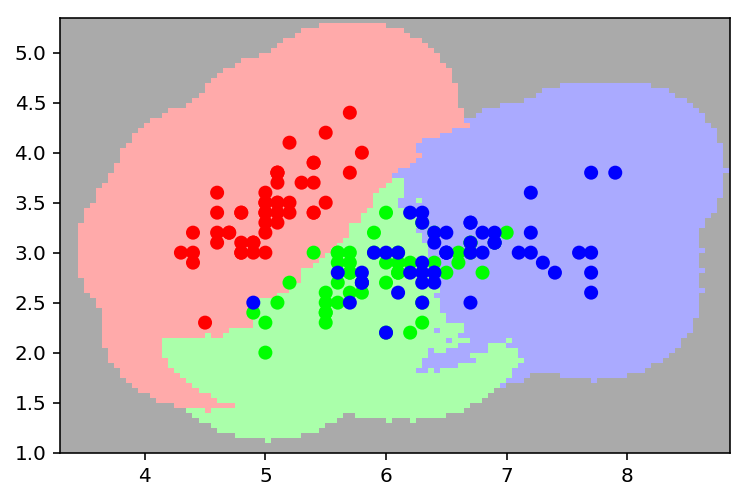

In [20]:
# radius = 0.9
radiusModel(x, target, cmap_light, cmap_bold, 0.9)

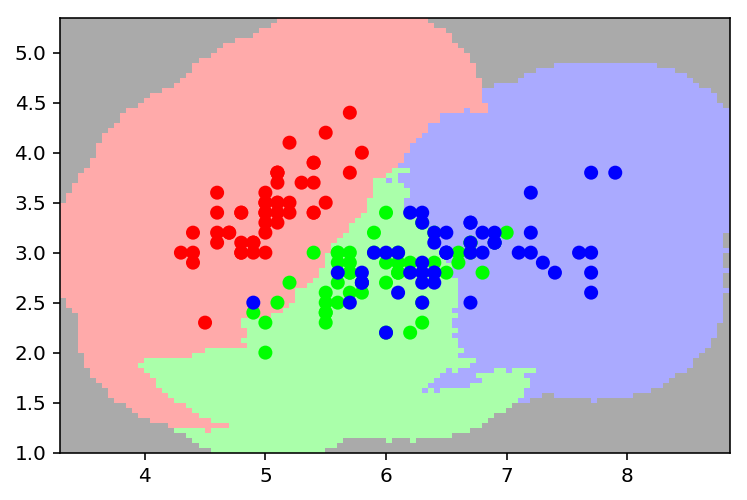

In [21]:
# radius = 1.1
radiusModel(x, target, cmap_light, cmap_bold, 1.1)